# CSCI 3352 Biological Networks, Spring 2020, Prof. Clauset
Submit here: https://moodle.cs.colorado.edu/course/view.php?id=1273

# Problem Set 3 : Random graph models

***

**Name**: Denver Chernin <br>
**Discussed with:** Julia Sanford

***

This assignment is due on Moodle by **11:55pm on Thursday, February 6th**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 95 points total, and 15 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Moodle.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [59]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : It's a small world (50 pts total)

We have argued that the mean geodesic distance $\langle \ell \rangle$ between pairs of nodes in an Erdos-Renyi random graph grows like $O(\log n)$. In this question, you will
* use the ER model as a substrate for a numerical experiment to quantify and demonstrate this behavior, and
* investigate the question of how this logarithmic growth depends on a network's edge density parameter $p$.

We'll build up to this experiment in four steps.

### Problem 1-A (10 pts)

The first step in developing the numerical simulation is to write a function that makes *one* measurement of $\langle \ell \rangle$ on a given network $G$.

* Write a function `compute_MGD(G)` that takes as input a network `G` and computes the *mean geodesic path length* (or "mean geodesic distance") as defined in Lecture 2. This function should start with calling the `networkx` function `all_pairs_shortest_path_length()`, which runs an All Pairs Shortest Paths algorithm. You'll need to then process the output of this function correctly in order to compute $\langle \ell \rangle$ the way it is defined in the lecture notes.
* Then apply your function to the graph below and report $\langle \ell \rangle$.

Hint: Because $G(n,p)$ is almost surely not connected, you won't be able to use `networkx`'s function `average_shortest_path_length()`, because it fails on disconnected graphs. You'll need to write your own, in order to handle 0 and $\infty$ distances correctly.

In [60]:
def compute_MGD(G):
    # input : a networkx graph G
    # output: the mean geodesic path length (defined in Lecture 2)
    
    #dictionary of apsp lengths
    paths = dict(nx.all_pairs_shortest_path_length(G))
    
    #I go through each item and then their items since every node's value is a dictionary set up like {node: {end_node: dist}}
    #This is very much like a matrix
    all_values = []
    for k, v in paths.items():
        for k1,v1 in v.items():
            if(v1 != 0):
                all_values.append(v1)
    #Once I have all values I average them out
    ellm = sum(all_values)/len(all_values)
    return ellm

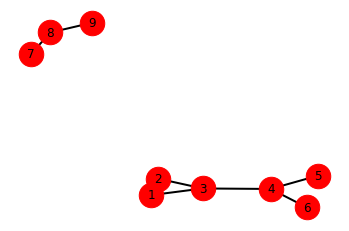

MGD =   1.78


In [61]:
G = nx.Graph([(1,3),(1,2),(2,3),(3,4),(4,5),(4,6),(7,8),(8,9)])
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

ellm = compute_MGD(G)
print(f'MGD =  %5.2f' % ellm)

### Problem 1-B (10 pts)

Given a way to measure the $\langle \ell \rangle$ for *one* network, we can jump right to a numerical experiment by choosing $p$ and then generating *one* network from $G(n,p)$ for a variety of choices of $n$, and for each, calculate $\langle \ell \rangle$. We'll visualize the result using a `semilogx` plot. (These results won't be *good*, and so we'll refine them in the next subproblem.)

* Set the target mean degree $c=2$, and use the `fast_gnp_random_graph()` function in `networkx` to generate a $G(n,p)$ network.
* To convincingly show the growth behavior, systematically vary $n$ over a wide range, e.g., choose $n=2^k$ for $k=\{4,5,6,7,8,9,10\}$.
* For each such choice of $n$, generate *one* $G(n,p)$ network, and compute its $\langle \ell \rangle$ using your `compute_MGD()` function.
* Then, produce a single `semilogx` plot that shows how $\langle \ell \rangle$ varies as a function of $n$. (Using a `semilogx` will conveniently make logarithmic functions look linear on the page.)
* Run this experiment a few times, and then comment briefly in the markdown box below what you observe about the stability and smoothness of the trend.

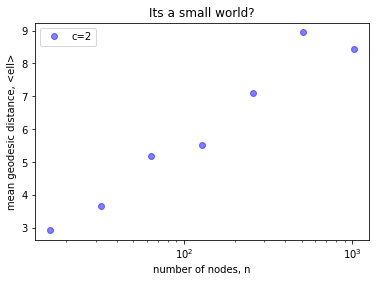

In [62]:
ns = np.logspace(4,10,num=7,base=2)  # number of nodes: 2^{4:10}
ns = ns.astype(int)                  # convert to ints
ellm = []                            # store the MGDs here

##### do not modify above here #####
c = 2 #set c value

#iterate through all n values assigned above
for n in ns:
    #calculate p so it maintains c
    p = c/(n-1)
    #generate the graph, compute the ellmean, and append to our list
    ellm.append(compute_MGD(nx.fast_gnp_random_graph(n, p)))

##### do not modify below here #####
plt.semilogx(ns, ellm, 'bo', alpha=0.5,label='c=2')
plt.title('Its a small world?')
plt.ylabel('mean geodesic distance, <ell>')
plt.xlabel('number of nodes, n')
plt.legend(loc='upper left');
plt.show()

The trend (checked ~15 times) of number of nodes versus mean geodesic distance seems to be linear and is relatively smooth. This makes sense because as the matrix grows to be n x n (where n is large) there will be many smaller distances, but also many more larger values that will increase the mean. 

### Problem 1-C (10 pts)

Because $G(n,p)$ is a random graph, each $\langle \ell \rangle$ is a *random variable*, meaning that it will fluctuate between different draws from the parameterized model $G(n,p)$. In other words, if we draw a sequence of graphs $G_1,G_2,\dots$ from the model $G(n,p)$, we'll get a sequence of measurements $\langle \ell \rangle_1,\langle \ell \rangle_2,\dots$, each a little different from each other.

To get a *smooth* trend in our plot, we need to get a *good* estimate of $\langle \ell \rangle$ for each choice of $n$. We do this by *averaging* the sequence of measurements $\langle \ell \rangle_1,\langle \ell \rangle_2,\dots$ for each choice of $n$. Averaging generates a better estimate of the mean because it estimates the central value around which the fluctuations occur. Plotting these central tendencies will produce a nicely smooth curve in the final figure for showing the growth of $\langle \ell \rangle(n)$. (This idea is _general_, meaning you can apply it to almost any model that produces a fluctuating signal, because of something called the Central Limit Theorem.)

* Write a function `compute_MGD_Gnp(n,p,rep)` that takes as input the parameters of $G(n,p)$ and a number of *repetions* `rep`, and returns the average MGD over `rep` draws from $G(n,p)$. (This should be a wrapper around your function `compute_MGD()`.)
* Apply your function with `n=256`, `c=2`, and `rep=10`, and report the results.

In [63]:
def compute_MGD_Gnp(n,p,rep):
    # input : a number of nodes 'n', edge density parameter 'p', and number of repetitions 'rep'
    # output: the mean geodesic path length of G(n,p), averaged over 'rep' instances
    ellavg = 0
    #similar to above MGD function, but we accumulate the values and average it over the repitions
    for i in range(rep):
        ellavg += compute_MGD(nx.fast_gnp_random_graph(n,p))
    return ellavg / rep

In [64]:
n=256
c=2
rep=10
ellmean = compute_MGD_Gnp(n, c/(n-1), rep)

##### do not modify below here #####
print(f'[ n={n} | c={c} | reps={rep} ] <ell> = %5.2f' % ellmean)

[ n=256 | c=2 | reps=10 ] <ell> =  7.06


### Problem 1-D (20 pts) Putting it all together

* Rewrite your numerical experiment so that it uses `compute_MGD_Gnp()` to compute a *good* estimate of $\langle \ell \rangle$, for each choice of $n$ and $c$.
* Expand your experiment to compute how $\langle \ell \rangle$ grows as a function of $n$, for each of three mean degree values $c=\{2,4,8\}$.
* Use $n=2^k$ for $k=\{4,5,6,7,8,9,10,11,12,13\}$. (This will take a while on your computer; plan accordingly)
* Then, on one figure, plot
  * the three data series from your simulations, and 
  * three *trend lines,* each of the form $b\times \log n + a$, one for each of the three data series. For each such trend line, choose a value $b$ that puts it visually very close to its data series. You may position these by hand, or by estimation using something like `np.polyfit`.
* Finally, briefly discuss what you see about how $b$ varies with $c$, and give some intuition as to why this behavior makes sense given what we know about the structure of ER graphs.

Hint 1: Separate the code for the experiment from the code for the visualization, so that you can tinker with the latter without having to re-run the former.

Hint 2: Running the full experiment to completion will take a while on your computer (it took 4 hours on mine), so prototype the code and visualization using only a few, smaller values of $n$. Once you have the bugs worked out, then do the full range of $n$ while you sleep/get coffee/go for a hike/etc.


(*5 pts extra credit*) Construct a second plot of $b$ vs. $c$ and describe the functional relationship between the two. To get a good view of it, you may need to consider additional values of $c$.

In [65]:
# YOUR CODE HERE (run the experiment)
ns = np.logspace(4,13,num=7,base=2)  # number of nodes: 2^{4:13}
ns = ns.astype(int)                  # convert to ints
ellmeans = {}                         # store the MGDs here

##### do not modify above here #####
c_values = [2,4,8]
#iterate through c values
for c in c_values:
    #create dictionary key for the current c
    ellmeans[c] = []
    #iterate through ns assigned above
    for n in ns:
        #calculate p value
        p = c/(n-1)
        #calculate mean ell over 10 iterations of every combination of c and n
        ellmeans[c].append(compute_MGD_Gnp(n,p,10))

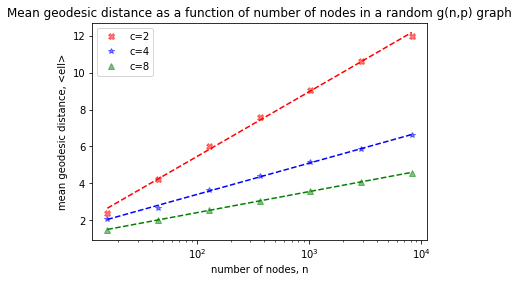

C: 2, B: 1.5278246346892839 
C: 4, B: 0.7380959488435158 
C: 8, B: 0.49628673905591314


In [66]:
# YOUR CODE HERE (plotting the results)

#Use numpy to fit coefficients (a,b) to our n values (log due to x plot axis)
#Extract coefficients and create equation to run our n values through to create our line
#After plot the trendline and the ellmeans
#Applied to all sections (they're for individual c values: 2,4,8)
z = np.polyfit(np.log(ns), ellmeans[2],1)
b = z[0]
a = z[1]
ys = [(b * np.log(i)) + a for i in ns]
plt.semilogx(ns, ys,'r--')
plt.semilogx(ns, ellmeans[2], 'X', alpha=0.5,label='c=2',color='red')

z1 = np.polyfit(np.log(ns), ellmeans[4],1)
b1 = z1[0]
a1 = z1[1]
ys1 = [(b1 * np.log(i)) + a1 for i in ns]
plt.semilogx(ns, ys1,'b--')
plt.semilogx(ns, ellmeans[4], '*', alpha=0.5,label='c=4',color='blue')

z2 = np.polyfit(np.log(ns), ellmeans[8],1)
b2 = z2[0]
a2 = z2[1]
ys2 = [(b2 * np.log(i)) + a2 for i in ns]
plt.plot(ns, ys2,'g--')
plt.semilogx(ns, ellmeans[8], '^', alpha=0.5,label='c=8',color='green')

plt.title('Mean geodesic distance as a function of number of nodes in a random g(n,p) graph')
plt.ylabel('mean geodesic distance, <ell>')
plt.xlabel('number of nodes, n')
plt.legend(loc='upper left');
plt.show()

print("C: 2, B:", b,"\nC: 4, B:",b1,"\nC: 8, B:",b2)

From the graph and array above, you can match the mean-degree (c) values with their b (slope) values. Lower mean-degree random graphs have a higher b than their high mean-degree counterparts. This makes sense because as mean-degree increases there are more paths to connect nodes thus making the average geodesic distance $\langle\ell\rangle$ a lower value. With more paths between nodes there are more chances for a shorter traversal. Also since we are using erdos-renyi graphs we need to calculate p for an given mean-degree. That calculation divides c by the number of nodes - 1. This means when c is small the probability of an edge existing becomes smaller.

***
***
## Problem 2 : Does this random graph make my $\langle \ell \rangle$ look big? (45 pts)

In this question, you will use the ER and Chung-Lu random graph models as null models to investigate the degree to which edge density and/or degree distributions can *explain* observed patterns in a biological network.

* Go to the [Index of Complex Networks](https://icon.colorado.edu/) (ICON) website, find the **P. pacificus nematode (2013)** entry, and download the `P.pacificus_neural.synaptic_1` network data file from the linked website. This file is in a `graphML` format, which is different from `GML`, but functionally is similar. `networkx` can read both.

### Problem 2-A (10 pts)

To warm up, load the *P. pacificus* network and treat it as a simple graph (edges unweighted and undirected; no multi-edges; no self-loops). Then calculate and report
* number of nodes $n$
* (undirected) edges $m$
* mean degree $\langle k \rangle$
* clustering coefficient $C$
* mean geodesic distance $\langle \ell \rangle$
* a `loglog` plot showing the degree distribution's CCDF $\Pr(K\geq k)$ (use `plot_CCDF()` from PS1)

reading the network file : p.pacificus_neural.synaptic_1.graphml



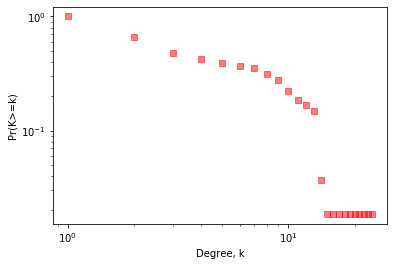

number of nodes, n  = 54
number of edges, m  = 141
mean degree   , <k> =  5.22
clustering coefficient, C     =  0.27
mean geodesic distance, <ell> =  2.57


In [67]:
# this data set is from :
# D.J. Bumbarger et al., "System-wide Rewiring Underlies Behavioral Differences in 
#                         Predatory and Bacterial-Feeding Nematodes." Cell 152, 109-119 (2013)
fname = 'p.pacificus_neural.synaptic_1.graphml'
print(f'reading the network file : {fname}\n')
Gmulti = nx.read_graphml('./' + fname)  # Gmulti is a directed multigraph
G = nx.Graph()                          # G will be a simple graph
G.add_edges_from(Gmulti.edges())        # G is now a simplified Gmulti (tricky :)
##### do not modify above here #####

#Calculating all types of summary statistics
n = len(G.nodes())
m = len(G.edges())
k = [i[1] for i in G.degree()]
kmean = sum(k) / n
C = nx.transitivity(G)
ellmean = nx.average_shortest_path_length(G)

#Meat of PLOT_CCDF function from ps2
kmax = max(k)
counts, bins = np.histogram(k, bins=[i for i in range(kmax+2)], density=True)
cumcounts = np.cumsum(counts)
cumcounts = np.insert(cumcounts,0,0)
plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
plt.xlabel('Degree, k')
plt.ylabel('Pr(K>=k)')
plt.show()

##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree   , <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

### Problem 2-B (15 pts)

Use the `Erdos-Renyi random graph model` to assess whether the values of $C$ and $\langle \ell \rangle$ are large, small, typical, or usual, given the *P. pacificus* edge density. Specifically,
* calculate and report the edge density _p_ for the *P. pacificus* network
* using an appropriately parameterized ER model, tabulate
  * the ER null distribution for $\Pr(C)$ and the empirical value of $C$
  * the ER null distribution for $\Pr(\langle \ell \rangle)$ and the empirical value of $\langle \ell \rangle$
* for each, use the given `plot_nullAndEmpirical()` function to compare the null and empirical values
* briefly discuss how well edge density explains or fails to explain the empirical values

Hint: to get a good null distribution, 200 networks should be sufficient.

In [68]:
def plot_nullAndEmpirical(nulls,emp,qlabel,nlabel,elabel,xlim,ylim):
    # input: nulls, a list of values representing a null (reference) distribution
    #        emp, the empirical value to be compared to the null
    #        qlabel [string], the name of the empirical quantity, e.g., '<ell>' or 'C'
    #        nlabel [string], the name of the null data series
    #        elabel [string], the name of the empirical data source
    #        xlim [scalar], the upper limit of the x-axis
    #        ylim [scalar], the upper limit of the y-axis

    counts, bins = np.histogram(nulls,bins=50,range=(0,xlim), density=True)
    nreps = len(nulls)

    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(bins[:-1], counts/nreps, 'b-', alpha=0.5, label=nlabel)
    plt.plot([emp, emp], [0, ylim], 'r-', alpha=0.5, label=elabel)
    plt.xlabel(qlabel)
    plt.ylabel('Pr('+qlabel+')')
    plt.xlim(0, xlim)
    plt.legend(loc='upper right');
    plt.show()
    
    return

Density of p.pacificus_neural.synaptic_1.graphml = 0.09853249475890985


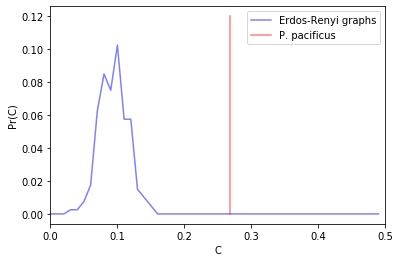

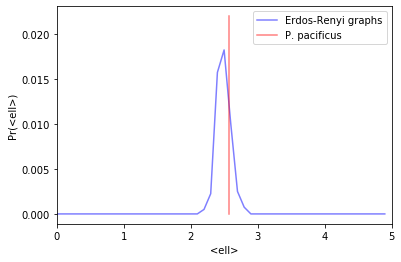

In [69]:
Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here
##### do not modify above here #####
D = nx.density(G)
print("Density of",fname,"=",D)

#have 200 iterations
for i in range(200):
    #Generate erdos-renyi graph
    T = nx.fast_gnp_random_graph(n, D)
    #calculate clustering coeff and ellmean
    Cs.append(nx.transitivity(T))
    ells.append(compute_MGD(T))
    

##### do not modify below here #####
plot_nullAndEmpirical(Cs,C,'C','Erdos-Renyi graphs','P. pacificus',0.5,0.12)
plot_nullAndEmpirical(ells,ellmean,'<ell>','Erdos-Renyi graphs','P. pacificus',5,0.022)

The erdos-renyi random graph model is not fully representative of the P. pacificus network. When comparing the distribution of clustering coefficient from 200 random graphs and the clustering coeff of our P. pacificus network, one can see that the clustering coeff for our network falls as an outlier of the erdos-renyi distribution. The erdos-renyi model does, in fact, represent the mean geodesic distance $\langle\ell\rangle$ of P. pacificus because the mean from the graph falls within the erdos-renyi distribution.

### Problem 2-C (5 pts)

Before we use the `Chung-Lu random graph model` to assess whether the *P. pacificus* values of $C$ and $\langle \ell \rangle$ are large, small, typical, or unusual:
* Use the `expected_degree_graph()` function in `networkx` to take the degree sequence of the *P. pacificus* network and generate a single simple Chung-Lu graph $G$ with no self-loops.
* Then, create simple ridiculogram visualizations of this network and of the empirical *P. pacificus* network.
* For both, note the number of edges each graph contains.
* Comment briefly on what similarities or differences you observe between these two visualizations.

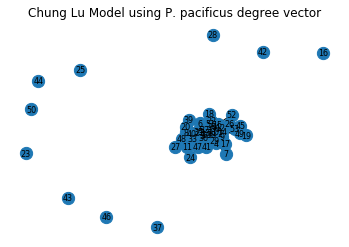

Chung Lu Num Edges: 126


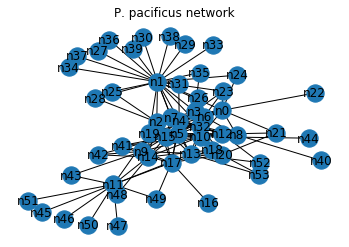

P. pacificus Num Edges: 141


In [70]:
#Creating chung-lu model with the same degree vector as the original vector and no self-loops
chung_lu = nx.expected_degree_graph(k, selfloops=False)
plt.title("Chung Lu Model using P. pacificus degree vector")
plt.axis('off')   
#Plot chung-lu graph
plt.show(nx.draw_networkx(chung_lu, node_size = 150, font_size = 8))
print("Chung Lu Num Edges:",len(chung_lu.edges()))

#draw p. pacificus 
plt.title("P. pacificus network")
plt.axis('off') 
plt.show(nx.draw_networkx(G))
print("P. pacificus Num Edges:",len(G.edges()))

The Chung-Lu model has a degree-heavy center with many disconnected nodes with no edges surrounding it. The P. pacificus network also has a degree-heavy center but has edges going to surrounding nodes that are similarly placed like the chung-lu model. The main difference is that P. pacificus has 1 component while chung-lu has many.

### Problem 2-D (10 pts)

Now, write a wrapper around your Chung-Lu graph generator that replicates the work of your answer to `Problem 1-D`, and thereby assess whether the values of $C$ and $\langle \ell \rangle$ are large, small, typical, or unusual, given the *P. pacificus* degree structure. Specifically,
* using an appropriately parameterized Chung-Lu model, tabulate and plot
  * the Chung-Lu null distribution for $\Pr(C)$ and the empirical value of $C$
  * the Chung-Lu null distribution for $\Pr(\langle \ell \rangle)$ and the empirical value of $\langle \ell \rangle$
* briefly discuss how well the degree structure explains or fails to explain the empirical values, and how accounting for degree structure changes the null distributions

Hint: to get a good null distribution, 200 networks should be sufficient.

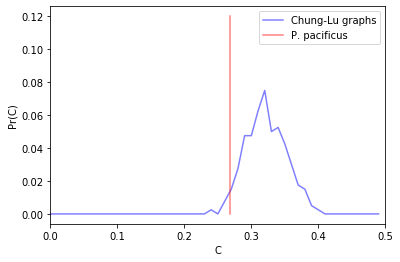

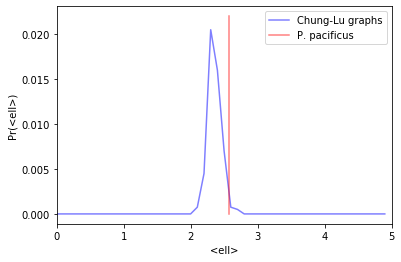

In [71]:
Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here
##### do not modify above here #####

#Same as problem above, but using chung-lu models
for i in range(200):
    g = nx.expected_degree_graph(k, selfloops=False)
    Cs.append(nx.transitivity(g))
    ells.append(compute_MGD(g))

##### do not modify below here #####
plot_nullAndEmpirical(Cs,C,'C','Chung-Lu graphs','P. pacificus',0.5,0.12)
plot_nullAndEmpirical(ells,ellmean,'<ell>','Chung-Lu graphs','P. pacificus',5,0.022)

The Chung-Lu model is a good representation of the P. pacificus network. This can be seen by comparing the cluster coefficient (cc) against the null model produced by the random graphs. The cc in our network falls within the bounds of our null model. This also happens with the mean geodesic distance $\langle\ell\rangle$ further showing that the Chung-Lu model can accurately represent P. pacificus. Using degree sequences/vectors instead of providing edge density allows cc and  $\langle\ell\rangle$ to be closer as the nodes in the random graphs will have the same degrees as the original graph.

***
***

## Problem 3 : Reading the literature (*10 pts extra credit*)

Choose a paper from the [Supplemental Reading list on the external course webpage](http://tuvalu.santafe.edu/~aaronc/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

Hint: This is a good way to generate some ideas for your class project. Also, even if you don't understand everything in the paper, that's okay. Do your best to summarize what you did understand.

**Random graphs containing arbitrary distributions of subgraphs**

* *What was the research question?*<br/>
This paper shows a class of models that can more accurately represent real-life graphs as RL-graphs are not as tree-like as most modern randoms model treat them as. They want to incorporate arbitrary subgraphs. 
<br/>

* *What was the approach the authors took to answer that question?*<br/>
They begin by talking about the Erdos-Renyi distribution and show how it can not produce the arbitrary subgraphs needed to present a network. They then began showing how other models such as "edge-triangle model" has their own disadvantages. After they introduced their own model and tested it showing the different arbitrary subgraphs it can create.
<br/>

* *What did they do well?*<br/>
They put their work through rigorous proofing for multiple applications which showed the broad usage of their work. 
<br/>

* *What could they have done better?*<br/>
They talk about how their model can mimic real life graphs by using densities of subgraphs, but failed to show examples. 
<br/>

* *What extensions can you envision?*<br/>
Being able to accurately represent real-life networks with random models can allow for greater understanding of interactions such as protein synthesis in a variety of non-nature occurring scenarios.